# Scikit-learn

This notebook contains a clear and consise overview of the [scikit-learn Python library](https://scikit-learn.org/stable/index.html)

Scikit-learn is Python's most usable and robust machine learning library. It uses a Python consistency interface to give a set of fast tools for machine learning and statistical modeling, such as classification a regression.

Scikit-learn is a Python library that provides a standard interface for [Supervised learning](https://en.wikipedia.org/wiki/Supervised_learning#:~:text=Supervised%20learning%20(SL)%20is%20the,on%20example%20input%2Doutput%20pairs.&text=In%20supervised%20learning%2C%20each%20example,also%20called%20the%20supervisory%20signal) and [Unsupervised learning](https://en.wikipedia.org/wiki/Unsupervised_learning).

## Supervised learning

A labeled dataset is used to train a supervised learning algorithm. A labeled data set has input and output parameters. The process of an algorithm learning from the training dataset may be thought of as a teacher supervising the learning process, it's termed supervised learning. 

Supervised learning is further grouped into <b>Regression</b> and <b>Classification</b>.

<b>Regression:</b> Predicting the value of an object's continuous-valued attribute.

<b>Classification:</b> Identifying the category to which an object belongs.

more can be found on [scikit-learn](https://scikit-learn.org/stable/supervised_learning.html).

## Unsupervised learning.

Unsupervised learning refers to a group of machine learning techniques that are used to discover patterns in data. Unsupervised algorithms are given not labelled data, which means that just the input variables are provided, with no matching output variables. In unsupervised learning, the algorithms are left to their own devices to find interesting patterns in the data.

Supervised learning is further grouped into <b>Clustering</b> and <b>Dimensionality reduction</b>.

<b>Clustering:</b> Objects that are related are automatically grouped into sets.

<b>Dimensionality reduction:</b> Reducing the number of random variables that must be taken into account.

more can be found [scikit-learn](https://scikit-learn.org/stable/unsupervised_learning.html)

## Difference between Supervised and Unsupervised Learning

- <b>Supervised Learning</b>
    -  Classification and Regression
    - Used for prediction
    - Input data is labelled
    - Uses training dataset
<br>  


- <b>Unsupervised Learning</b>
    - Clustering, dimensionality reduction etc
    - Used for analysis
    - Input data is not labelled
    - Uses only input dataset

## Classification Analysis: Wine Data Set

[Wine Quality Data Set](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/) from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)

I will perfome classification analysis on the red wine data set

### Setup

***

In [1]:
# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Logistic regression.
import sklearn.linear_model as lm

# K nearest neaighbours.
import sklearn.neighbors as nei

# Helper functions.
import sklearn.model_selection as mod

# Fancier, statistical plots.
import seaborn as sns

In [2]:
# Standard plot size.
plt.rcParams['figure.figsize'] = (15, 10)

# Standard coloir scheme.
plt.style.use('ggplot')

### Displaying the Wine Dataset

***

In [3]:
# Load the red wine dataset from UCI Machine Learning Repository
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

In [4]:
# Have a look at the data
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
# Summary statistics
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
# Correlation
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [8]:
# Create generic wine quality labels
bins = (2, 6.5, 8)
labels = ['bad', 'good']
df['quality'] = pd.cut(x = df['quality'], bins = bins, labels = labels)

In [9]:
# Count how many wines fit the labels
df['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

### Visualise

***

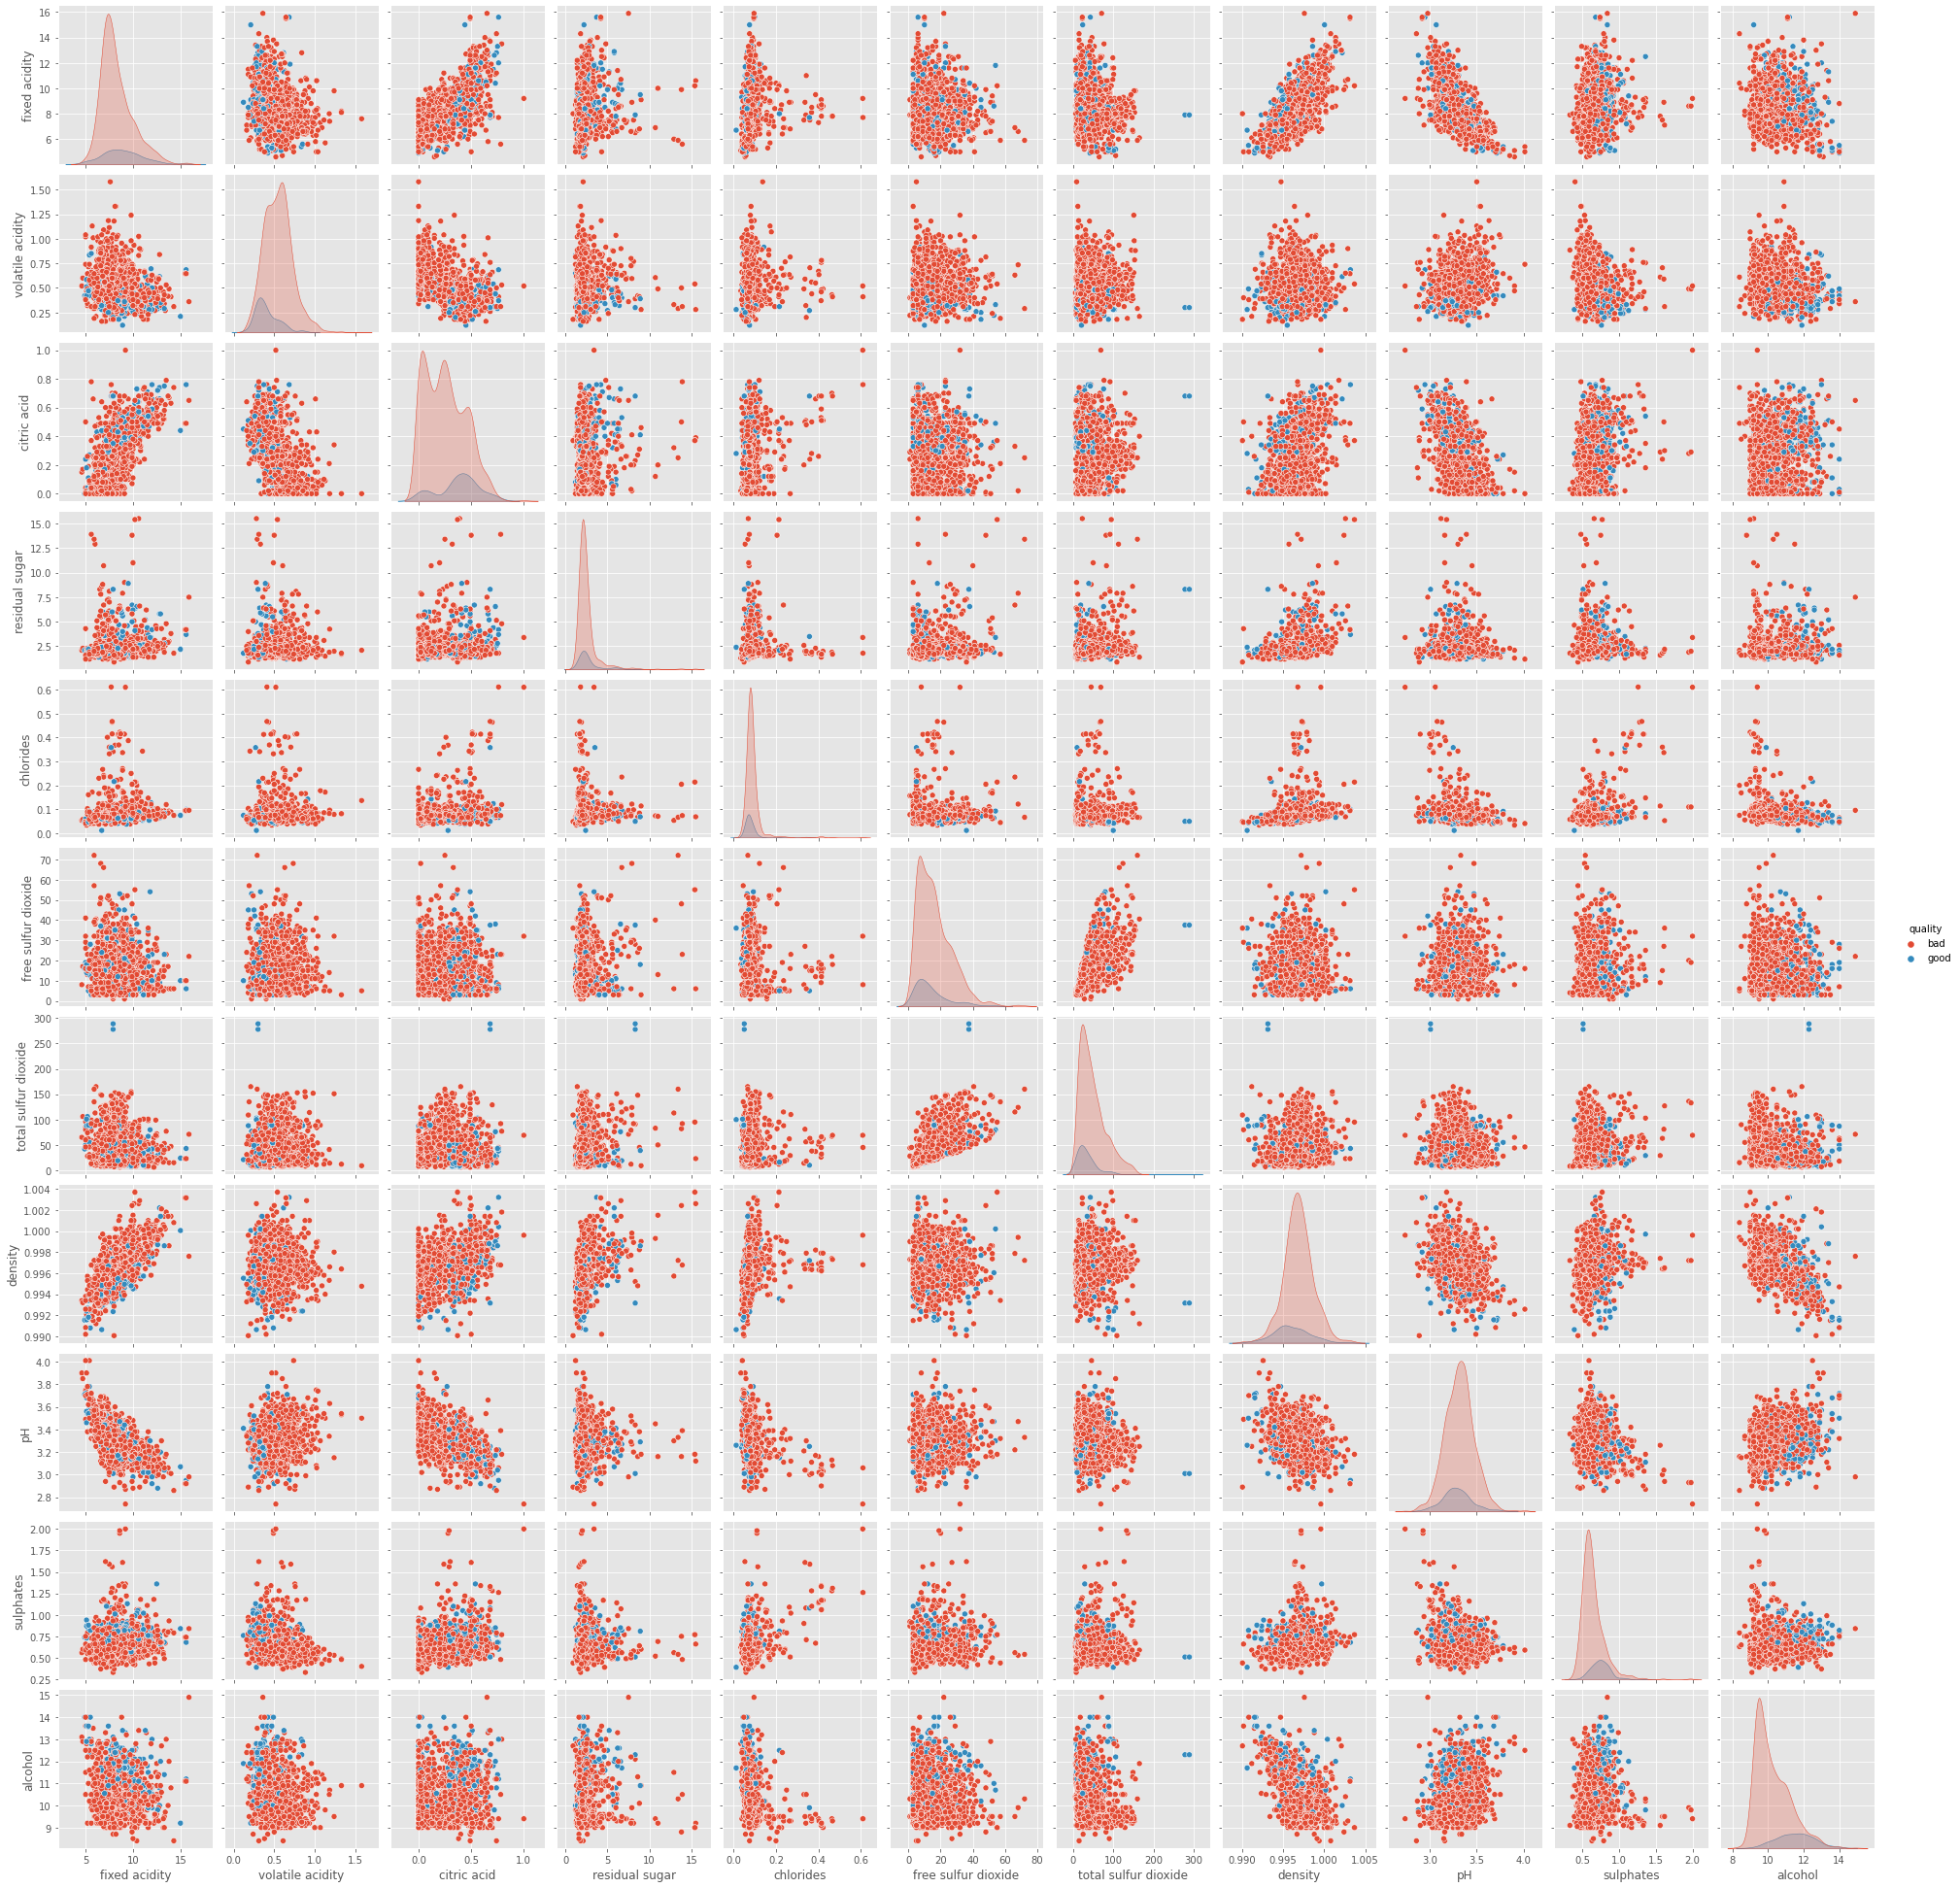

In [10]:
# Scatter plots and kdes.
sns.pairplot(df, hue='quality')

### Two Dimensions

***

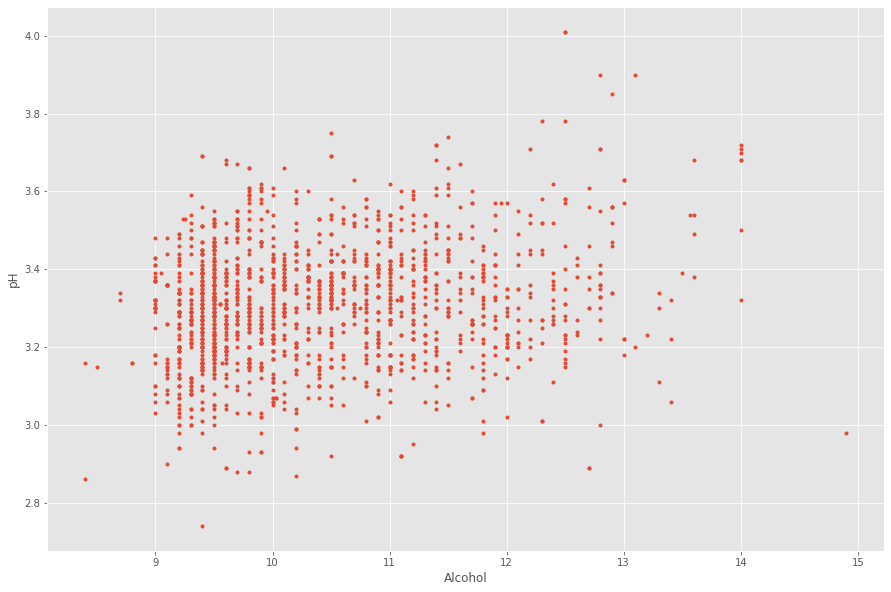

In [11]:
# New figure.
fig, ax = plt.subplots()

# Scatter plot.
ax.plot(df['alcohol'], df['pH'], '.')

# Set axis labels.
ax.set_xlabel('Alcohol');
ax.set_ylabel('pH');

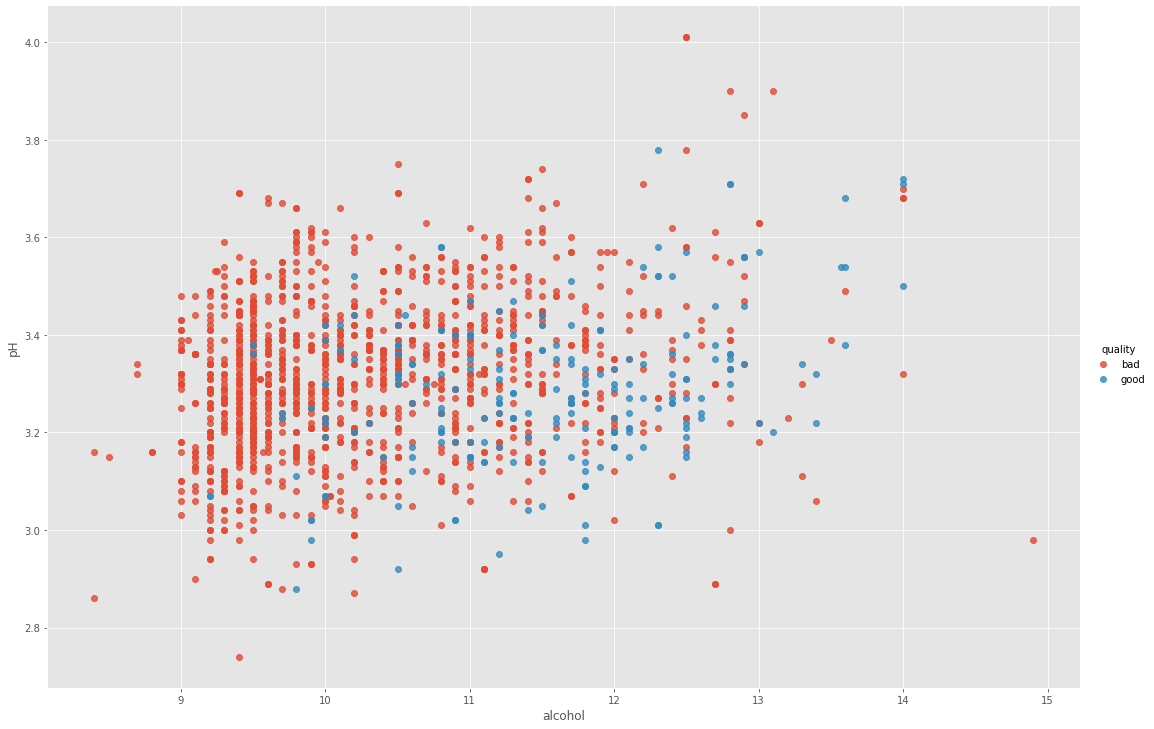

In [12]:
# Seaborn is great for creating complex plots with one command.
sns.lmplot(x="alcohol", y="pH", hue='quality', data=df, fit_reg=False, height=10, aspect=1.5);

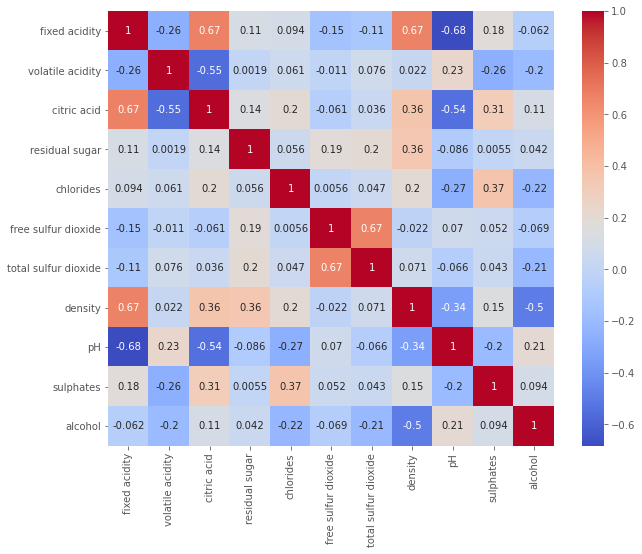

In [13]:
# Heatmap
corr = df.corr()
#Plot figsize
plt.figure(figsize=(10, 8))
# Generate heat map
sns.heatmap(corr,annot=True,cmap="coolwarm")
# Show plot
plt.show()

### Using PyPlot

***

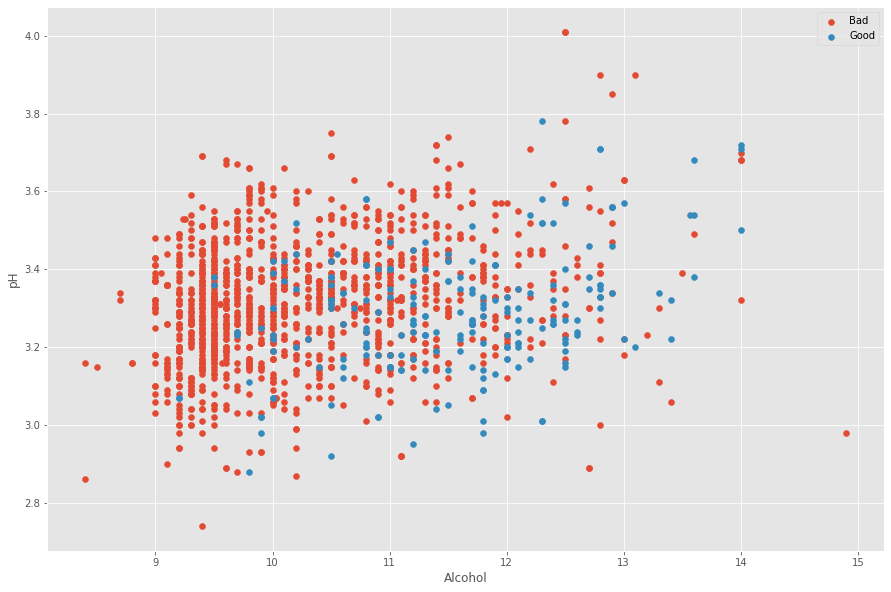

In [14]:
# Segregate the data.
bad = df[df['quality'] == 'bad']
good = df[df['quality'] == 'good']

# New plot.
fig, ax = plt.subplots()

# Scatter plots.
ax.scatter(bad['alcohol'], bad['pH'], label='Bad')
ax.scatter(good['alcohol'], good['pH'], label='Good')

# Show the legend.
ax.set_xlabel('Alcohol')
ax.set_ylabel('pH')
ax.legend();

In [15]:
# How the segregation works
df['quality'] == 'bad'

0       True
1       True
2       True
3       True
4       True
        ... 
1594    True
1595    True
1596    True
1597    True
1598    True
Name: quality, Length: 1599, dtype: bool

In [16]:
df[df['quality'] == 'bad'].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


### Using GroupBy()

***

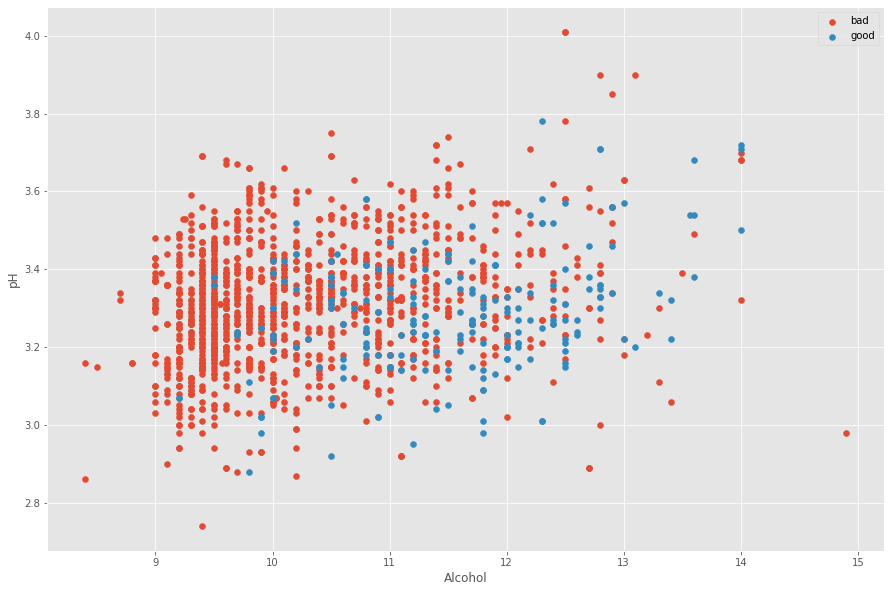

In [17]:
# New plot.
fig, ax = plt.subplots()

# Using pandas groupby().
for species, data in df.groupby('quality'):
    ax.scatter(data['alcohol'], data['pH'], label=species)
    
# Show the legend.
ax.set_xlabel('Alcohol')
ax.set_ylabel('pH')
ax.legend();

In [18]:
# Group by typically takes a categorical variable.
x = df.groupby('quality')
x

In [19]:
# Pivot tables.
x.mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
bad,8.236831,0.547022,0.254407,2.512120,0.089281,16.172214,48.285818,0.996859,3.314616,0.644754,10.251037
good,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049


In [20]:
# Looping through groupby()
for i, j in x:
    print()
    print(f"i is: '{i}'")
    print(f"j looks like:\n{j[:3]}")
    print()


i is: 'bad'
j looks like:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol quality  
0      9.4     bad  
1      9.8     bad  
2      9.8     bad  


i is: 'good'
j looks like:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
7             7.3              0.65         0.00             1.2      0.065   
8             7.8              0.58         0.02             2.0      0.073   
16           

### Test & Train Split

***

In [53]:
# Split the data frame in two.
train, test = mod.train_test_split(df)

In [54]:
# Show some training data.
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
193,7.6,0.55,0.21,2.2,0.071,7.0,28.0,0.99640,3.28,0.55,9.7,bad
903,6.8,0.59,0.06,6.0,0.060,11.0,18.0,0.99620,3.41,0.59,10.8,good
1233,10.2,0.23,0.37,2.2,0.057,14.0,36.0,0.99614,3.23,0.49,9.3,bad
1551,7.1,0.67,0.00,2.3,0.083,18.0,27.0,0.99768,3.44,0.54,9.4,bad
1533,8.0,0.39,0.30,1.9,0.074,32.0,84.0,0.99717,3.39,0.61,9.0,bad


In [55]:
# The indicies of the train array.
train.index

Int64Index([ 193,  903, 1233, 1551, 1533,  901,  318,  973, 1560,    4,
            ...
            1125,  232, 1507,  542, 1434,  899, 1173,  107, 1064, 1151],
           dtype='int64', length=1199)

In [56]:
# Show some testing data.
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1087,7.9,0.19,0.42,1.6,0.057,18.0,30.0,0.99400,3.29,0.69,11.2,bad
740,8.3,0.76,0.29,4.2,0.075,12.0,16.0,0.99650,3.45,0.68,11.5,bad
1454,11.7,0.45,0.63,2.2,0.073,7.0,23.0,0.99974,3.21,0.69,10.9,bad
628,8.7,0.54,0.26,2.5,0.097,7.0,31.0,0.99760,3.27,0.60,9.3,bad
955,8.5,0.21,0.52,1.9,0.090,9.0,23.0,0.99648,3.36,0.67,10.4,bad


In [57]:
# Remaining rows length 
test.index.size

400

### Two Dimensions: Test Train Split

***

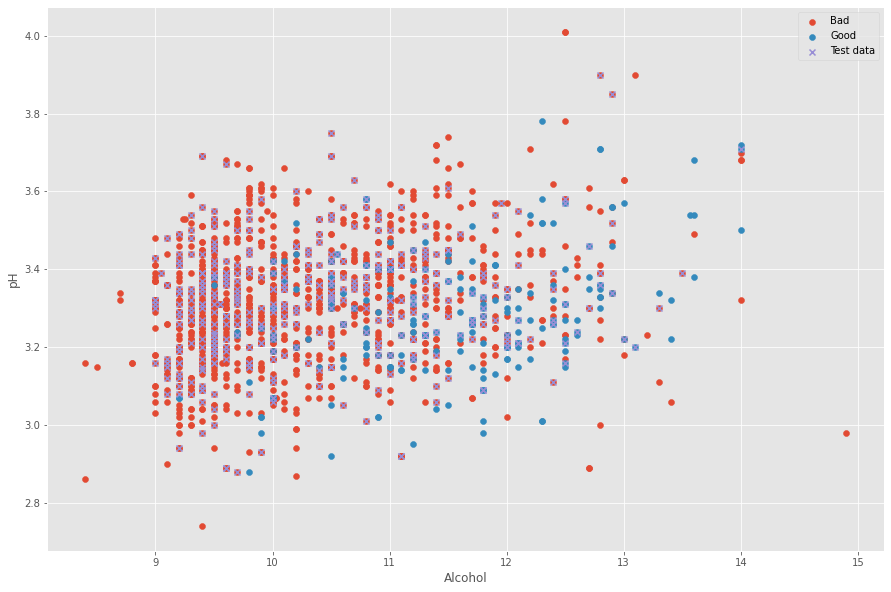

In [58]:
# Segregate the training data.
setos = train[train['quality'] == 'bad']
versi = train[train['quality'] == 'good']

# New plot.
fig, ax = plt.subplots()

# Scatter plots for training data.
ax.scatter(bad['alcohol'], bad['pH'], marker='o', label='Bad')
ax.scatter(good['alcohol'], good['pH'], marker='o', label='Good')

# Scatter plot for testing data.
ax.scatter(test['alcohol'], test['pH'], marker='x', label='Test data')

# Show the legend.
ax.set_xlabel('Alcohol')
ax.set_ylabel('pH')
ax.legend();

### Two Dimensions: Inputs and Outputs

***

In [59]:
# Give the inputs and outputs convenient names.
inputs, outputs = train[['alcohol', 'pH']], train['quality']

In [60]:
# Peek at the inputs.
inputs.head()

,alcohol,pH
193,9.7,3.28
903,10.8,3.41
1233,9.3,3.23
1551,9.4,3.44
1533,9.0,3.39


In [61]:
# Peek at the outputs.
outputs.head()

193      bad
903     good
1233     bad
1551     bad
1533     bad
Name: quality, dtype: category
Categories (2, object): ['bad' < 'good']